# Regression

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Tutorial 2

$\newcommand{\trace}[1]{\operatorname{tr}\left\{#1\right\}}$
$\newcommand{\Norm}[1]{\lVert#1\rVert}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\inner}[2]{\langle #1, #2 \rangle}$
$\newcommand{\DD}{\mathscr{D}}$
$\newcommand{\grad}[1]{\operatorname{grad}#1}$
$\DeclareMathOperator*{\argmin}{arg\,min}$

Setting up the environment

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## The data set

We will use an old dataset on the price of housing in Boston (see [description](https://archive.ics.uci.edu/ml/datasets/Housing)). The aim is to predict the median value of the owner occupied homes from various other factors. We will use a normalised version of this data, where each row is an example. The median value of homes is given in the first column (the label) and the value of each subsequent feature has been normalised to be in the range $[-1,1]$. Download this dataset from [mldata.org](http://mldata.org/repository/data/download/csv/housing_scale/).

Read in the data using ```np.loadtxt``` with the optional argument ```delimiter=','```.

Check that the data is as expected using ```print()```. Use ```np.delete``` and ```del``` to remove the column containing the binary variable 'chas' and the corresponding label, respectively. ```names.index('chas')``` is a convenient way to get the index of that column. This should give you an ```np.ndarray``` with 506 rows (examples) and 13 columns (1 label and 12 features).

In [2]:
names = ['medv', 'drim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

In [3]:
# Solution goes here
data = np.loadtxt('housing_scale.csv',delimiter = ',')
data = np.delete(data,names.index('chas'),1)
data.shape

(506, 13)

In [4]:
print('name, min, max, #unique:')
print('\n'.join([str((name, min(vals), max(vals), len(set(vals)))) for name, vals in zip(names, data.T)]))
assert data.shape == (506,13)

name, min, max, #unique:
('medv', 5.0, 50.0, 43)
('drim', -1.0, 1.0, 501)
('zn', -1.0, 1.0, 26)
('indus', -1.0, 1.0, 76)
('chas', -1.0, 1.0, 81)
('nox', -1.0, 1.0, 446)
('rm', -1.0, 1.0, 356)
('age', -1.0, 1.0, 412)
('dis', -1.0, 1.0, 9)
('rad', -1.0, 1.0, 66)
('tax', -1.0, 1.0, 46)
('ptratio', -1.0, 1.0, 357)
('b', -1.0, 1.0, 455)


## Plotting

Plotting is done using the [matplotlib](http://matplotlib.org/) toolbox. For example:

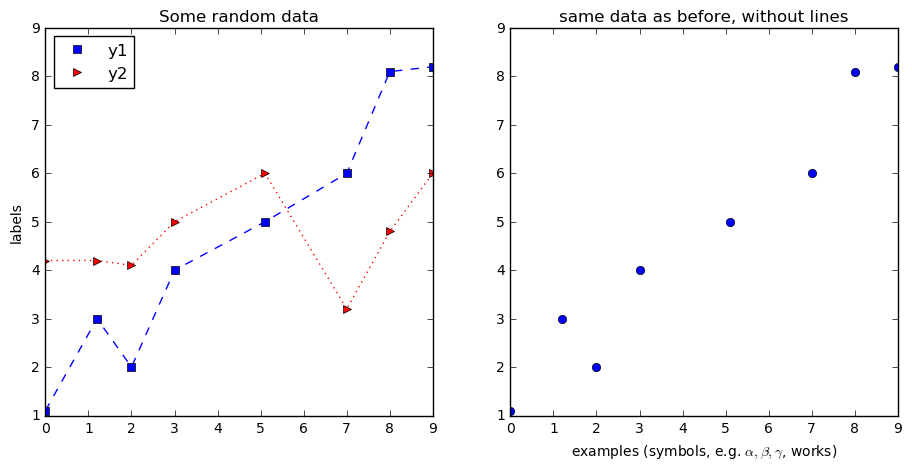

In [5]:
x = [0,1.2,2,3,5.1,7,8,9]
y1 = [1.1,3,2,4,5,6,8.1,8.2]
y2 = [4.2,4.2,4.1,5,6,3.2,4.8,6]
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(121)
ax.plot(x,y1,'b--')
ax.plot(x,y1,'bs',label='y1')
ax.plot(x,y2,'r:')
ax.plot(x,y2,'r>',label='y2')
ax.set_title('Some random data')
ax.set_ylabel('labels')
ax.legend(loc='upper left', numpoints=1)
ax = fig.add_subplot(122)
ax.plot(x,y1,'bo')
ax.set_title('same data as before, without lines')
ax.set_xlabel(r'examples (symbols, e.g. $\alpha,\beta,\gamma$, works)')

Plot the median value of the property (vertical axis) versus the tax rate (horizontal axis).

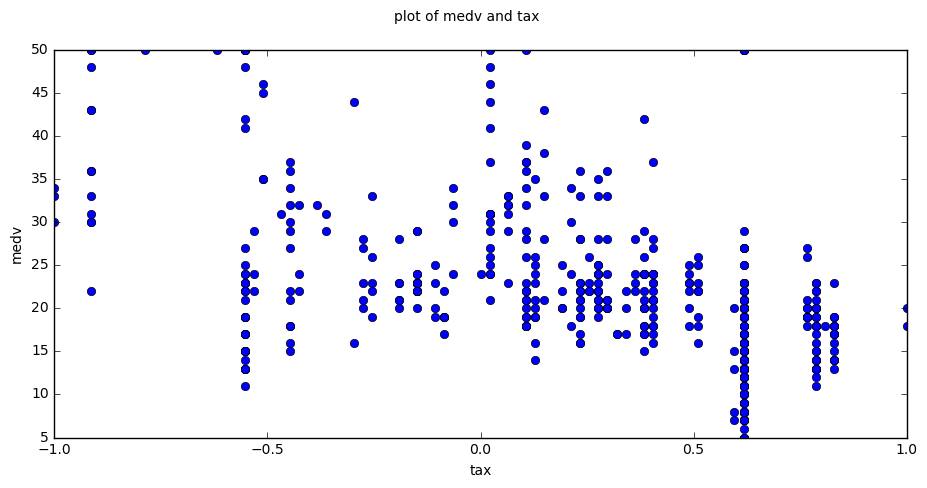

In [6]:
# Solution goes here
medv = data[:,names.index('medv')]
tax = data[:,names.index('tax')]
fig = plt.figure(figsize=(11,5))
plt.plot(tax,medv,'bo')
fig.suptitle('plot of medv and tax')
plt.ylabel('medv')
plt.xlabel('tax')

## Regression without regularization

Implement the sum of squares error function to find the maximum likelihood solution $w_{ML}$ for the regression problem. Implement subroutines for polynomial basis function of degree 2. See [expansion based on binomial formula](http://en.wikipedia.org/wiki/Polynomial_kernel).

In [7]:
# Solution goes here
def W(X, y):
    return(np.linalg.solve(X.T.dot(X),X.T.dot(y)))

def K(x,y,c,d):
    assert(len(x) == len(y))
    return((sum(x*y)+c)^d)

# test
X = data[:,0:12]
y = data[:,12]
w = W(X,y)

## Training and testing

Use half of the available data for training the model using maximum likelihood. The rest of the data is allocated to the test set. Report the root mean squared error (RMSE) for the training set and the test set.

In [8]:
# Solution goes here

def RMSE(X,w,y):
    tmp = X.dot(w)-y
    return(np.sqrt(tmp.T.dot(tmp)/len(tmp)))

# test
# rmse = RMSE(X, w, y)
# print(rmse)

n = data.shape[0]
part = 0.5
sampled_index = np.random.choice(n, n*part, replace=False)

training_set = data[sampled_index,:]
test_set = data[[ii for ii in np.arange(n) if ii not in sampled_index],:]

training_x = training_set[:,1:]
training_y = training_set[:,0]

test_x = test_set[:,1:]
test_y = test_set[:,0]

w = W(training_x,training_y)
training_rmse = RMSE(training_x,w,training_y)
test_rmse = RMSE(test_x,w,test_y)

print(training_rmse)
print(test_rmse)

5.29547650483
4.67431556593


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Using the standard basis function (no transformations), find the feature with the biggest weight. Plot two figures, one for the training set and one for the test set. In each figure, plot the label against the this most important feature. Also include a line showing your maximum likelihood predictor (*Hint: use* ```np.arange``` *to generate data*).

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


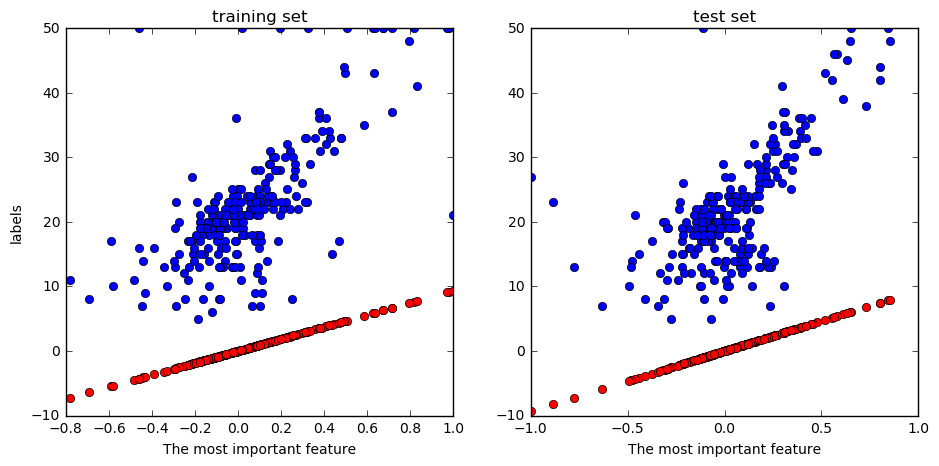

In [9]:
# Solution goes here
# print(w) # 5th feature 
x1 = training_x[:,4]
x2 = test_x[:,4]
pred_y1 = x1*w[4]
pred_y2 = x2*w[4]

fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(121)
ax.plot(x1,training_y,'bo')
ax.plot(x1,pred_y1,'ro')
ax.set_title('training set')
ax.set_xlabel('The most important feature')
ax.set_ylabel('labels')
ax.legend(loc='upper left', numpoints=1)
ax = fig.add_subplot(122)
ax.plot(x2,test_y,'bo')
ax.plot(x2,pred_y2,'ro',)
ax.set_title('test set')
ax.set_xlabel('The most important feature')

## Regression with regularization

Implement the regularized least squares regression to find the maximum likelihood solution $w_{reg}$ with regularizer $\lambda>0$. (Warning: the keyword ```lambda``` is a reserved word in Python).

In [10]:
# Solution goes here
def regularized_w(X,y,coef=1):
    assert(coef > 0)
    return(np.linalg.solve(coef*np.identity(X.shape[1])+X.T.dot(X),X.T.dot(y)))

# test
# print(regularized_w(X,y,0.1))

Similar to the previous exercise, plot two figures showing the most important feature along with the label and prediction. Use $\lambda = 1.1$.

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


regularized
4.77341237403
5.33139965786
not regularized
4.7635495569
5.31734117038


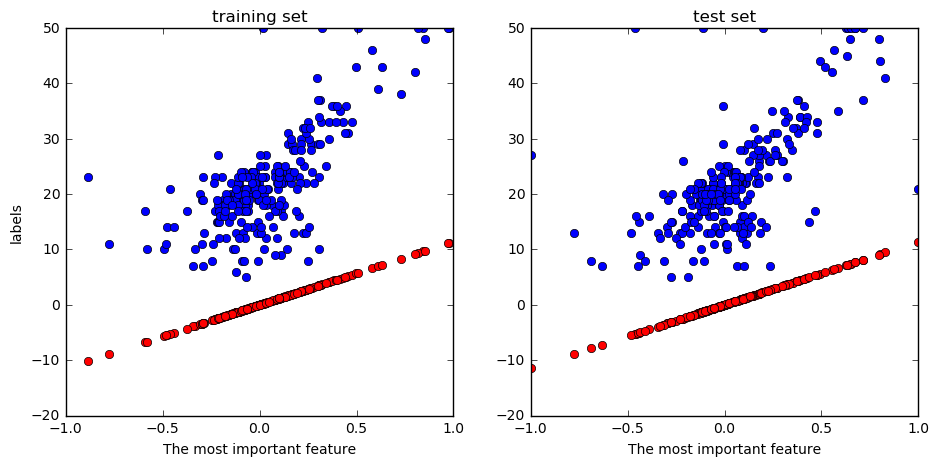

In [11]:
# Solution goes here

n = data.shape[0]
part = 0.5
sampled_index = np.random.choice(n, n*part, replace=False)

training_set = data[sampled_index,:]
test_set = data[[ii for ii in np.arange(n) if ii not in sampled_index],:]

training_x = training_set[:,1:]
training_y = training_set[:,0]

test_x = test_set[:,1:]
test_y = test_set[:,0]

w = regularized_w(training_x,training_y, 1.1)
w2 = W(training_x, training_y)
print("regularized")
print(RMSE(training_x,w,training_y))
print(RMSE(test_x,w,test_y))
print("not regularized")
print(RMSE(training_x,w2,training_y))
print(RMSE(test_x,w2,test_y))

# print(training_rmse)
# print(test_rmse)

x1 = training_x[:,4]
x2 = test_x[:,4]
pred_y1 = x1*w[4]
pred_y2 = x2*w[4]

fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(121)
ax.plot(x1,training_y,'bo')
ax.plot(x1,pred_y1,'ro')
ax.set_title('training set')
ax.set_xlabel('The most important feature')
ax.set_ylabel('labels')
ax.legend(loc='upper left', numpoints=1)
ax = fig.add_subplot(122)
ax.plot(x2,test_y,'bo')
ax.plot(x2,pred_y2,'ro',)
ax.set_title('test set')
ax.set_xlabel('The most important feature')

## Analysis of results

Compare the RSME of regression with and without regularization. By also considering the plots, describe what you observe and explain your observations.

### Solution description

## (optional) Exploration of basis functions and regularization parameter

The choice of basis function as well as the value of the regularization parameter $\lambda$ affects the performance of the predictor. Using the same training and test data as before, compute the different RMSE for:
* The standard basis (as done above)
* polynomial basis function of degree 2.
* $\lambda$ = [0.01, 0.1, 1, 10, 100]

In [12]:
# Solution goes here


